In [17]:
# libs
from torchvision import models
import torch

In [2]:
print(dir(models))

['AlexNet', 'DenseNet', 'EfficientNet', 'GoogLeNet', 'GoogLeNetOutputs', 'Inception3', 'InceptionOutputs', 'MNASNet', 'MobileNetV2', 'MobileNetV3', 'RegNet', 'ResNet', 'ShuffleNetV2', 'SqueezeNet', 'VGG', '_GoogLeNetOutputs', '_InceptionOutputs', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_utils', 'alexnet', 'densenet', 'densenet121', 'densenet161', 'densenet169', 'densenet201', 'detection', 'efficientnet', 'efficientnet_b0', 'efficientnet_b1', 'efficientnet_b2', 'efficientnet_b3', 'efficientnet_b4', 'efficientnet_b5', 'efficientnet_b6', 'efficientnet_b7', 'feature_extraction', 'googlenet', 'inception', 'inception_v3', 'mnasnet', 'mnasnet0_5', 'mnasnet0_75', 'mnasnet1_0', 'mnasnet1_3', 'mobilenet', 'mobilenet_v2', 'mobilenet_v3_large', 'mobilenet_v3_small', 'mobilenetv2', 'mobilenetv3', 'quantization', 'regnet', 'regnet_x_16gf', 'regnet_x_1_6gf', 'regnet_x_32gf', 'regnet_x_3_2gf', 'regnet_x_400mf', 'regnet_x_80

# AlexNet

In [3]:
alexnet = models.AlexNet()

In [4]:
alextnet_pretrained = models.alexnet()

In [5]:
alextnet_pretrained

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

# ResNet

In [6]:
resnet = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/luba/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100.0%


In [7]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [8]:
# creating a pre-processing steps for the image
from torchvision import transforms

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),  # crop around the center
    transforms.ToTensor(), 
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225]
    )
])

In [10]:
# very similar to Pipe on scikit learn and recipe on tidymodels|
preprocess

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [12]:
from PIL import Image 

img = Image.open("../../data/teemo.jpeg")

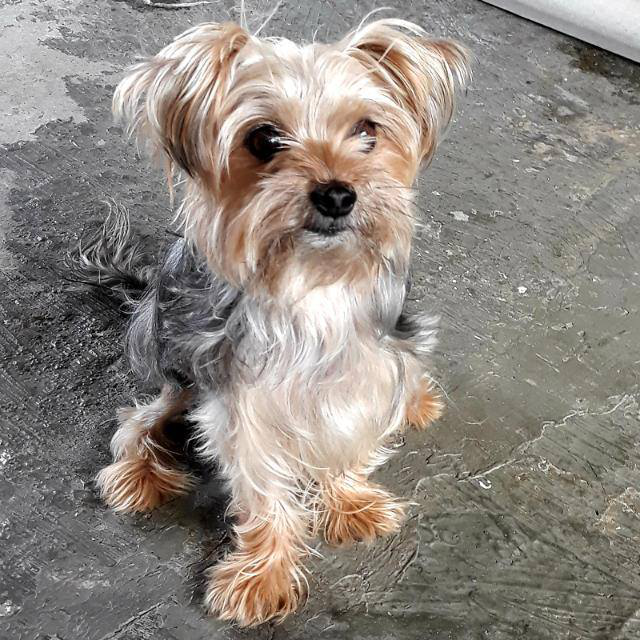

In [13]:
img

In [19]:
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)


In [20]:
# in order to do inference we need to put the nn in eval mode
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

If we forget to do that, some pretrained models, like batch normalization and dropout, will not produce meaningful answers, just because of the way they work internally.

In [21]:
out = resnet(batch_t)
out

tensor([[-1.8945e+00,  9.6781e-01, -2.4369e+00, -1.2068e+00, -1.6961e+00,
         -2.9560e+00, -3.0220e+00,  1.8987e+00,  7.2284e-01, -7.8670e-01,
          2.2039e-01, -7.7030e-01,  2.6681e-01, -7.5548e-01, -1.5468e+00,
          1.1650e+00, -3.8458e-01, -8.1957e-01, -3.6951e+00,  4.4294e-02,
         -1.3715e-01, -8.8494e-02, -2.1244e+00, -8.7431e-01, -1.1466e+00,
         -8.5584e-01,  1.1449e+00,  2.3085e+00, -1.2615e+00, -8.5118e-02,
         -1.4195e+00, -1.7991e-01,  1.8417e+00,  3.2207e-01, -1.1852e+00,
          1.6016e-01,  1.6742e+00,  2.6701e-02,  4.8092e-01, -1.7718e+00,
         -1.3609e+00,  2.2573e+00,  5.2239e-02, -6.7153e-01,  5.2538e-01,
         -1.0225e+00, -1.7890e+00, -2.3816e+00, -2.1701e+00, -1.3885e+00,
         -1.6142e+00, -8.1117e-01,  1.6382e+00,  3.4904e-01,  8.6154e-01,
         -1.9641e+00, -3.7819e-01,  9.1613e-02,  8.0045e-01, -1.2779e+00,
          2.6051e-01, -1.7161e+00, -8.5167e-01,  1.5886e-01, -4.1285e+00,
         -2.1978e+00, -5.2301e-01, -1.

In [22]:
with open("../../data/imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [23]:
# we can use the max function to get the maximum index
# where there is the max probabilitie of been that class
_, index = torch.max(out, 1)

In [24]:
percentage = torch.nn.functional.softmax(out, dim=1)[0]*100
labels[index[0]], percentage[index[0]].item()

('Yorkshire terrier', 96.2076416015625)

# A pretrained network that describes scenes (NeuralTalk2)

I have problems with the repository, divergence on types of tensor on CPU and GPU.